In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

distance1 fonksiyonu, Xdata adlı bir veri kümesindeki her bir örnek için, verilen Y örneği ile aralarındaki mesafeyi hesaplar. Xdata, d satır ve nsample sütuna sahip bir veri matrisidir. Y, d satır ve 1 sütuna sahip bir örnek vektörüdür. Bu fonksiyon, veri kümesindeki tüm örneklerle tek tek dolaşarak mesafeleri hesaplar ve sonuçları 1 satır ve nsample sütuna sahip bir çıktı matrisinde toplar.

In [11]:
# loop over points in Xdata
def distance1(Xdata,Y):
    # Xdata is dataset/feature matrix with d rows and nsample columns
    # Y is a single data point with d rows and 1 column
    # ouptut is 1 row and nsample columns
    nsample = Xdata.shape[1]
    output = np.zeros((1,nsample))
    for i in range(nsample):
        output[0,i] = np.sqrt(np.sum(np.square(Xdata[:,[i]]-Y)))
    return output

distance2 fonksiyonu, aynı işlevi yerine getirir, ancak vektörleştirilmiş bir yaklaşım kullanır. Bu fonksiyon, veri kümesindeki tüm örneklerle aynı anda hesaplayarak daha hızlı bir işlem yapar. Xdata ve Y vektörleri aynı boyutta olmalıdır, bu nedenle Y vektörü, d satır ve 1 sütuna sahip bir örnek vektörüdür. Fonksiyon, sonuçları 1 satır ve nsample sütuna sahip bir çıktı matrisinde toplar.

In [12]:
# use vectorized approach
def distance2(Xdata,Y):
    # Xdata is dataset/feature matrix with d rows and nsample columns
    # Y is a single data point with d rows and 1
    return np.sqrt(np.sum(np.square(Xdata - Y),axis=0,keepdims=True))

aşağıdaki kod "distance1" ve "distance2" kullanarak farklı boyutlardaki matrisler arasındaki işlem süresini ölçer.

In [13]:
nsample = 100000
nfeature = 5
Y = np.random.randn(nfeature,1)
Xdata = np.random.randn(nfeature,nsample)

array_ncol değişkeni, test edilecek farklı örnek boyutlarını içeren bir liste oluşturur.

array_time = np.zeros(np.size(array_ncol)) - array_time değişkeni, hesaplama zamanlarını saklamak için sıfırlardan oluşan bir dizi oluşturur.

nrun = 10 - nrun değişkeni, her boyuttaki hesaplamaların 10 kez tekrarlanacağını belirtir.

for i in range(np.size(array_ncol)): - array_ncol boyutları üzerinde bir for döngüsü başlatılır.

ndim = array_ncol[i] - ndim, array_ncol değişkeninin i indeksindeki boyutu alır.

time_start = time.time() - Her örnek boyutu için hesaplama süresini ölçmek için bir zaman damgası alınır.

for count in range(nrun): - Her örnek boyutu için nrun tekrarlamaları ile bir döngü başlatılır.

d = distance1(Xdata[:,0:ndim],Y) - Xdata veri kümesi ve Y arasındaki uzaklığı hesaplamak için distance1 fonksiyonu kullanılır.

time_end = time.time() - Hesaplamalar tamamlandıktan sonra bir zaman damgası daha alınır.

array_time[i] = time_end - time_start - Hesaplama süresi array_time değişkeninde saklanır.

print("array_ncol: {}".format(array_ncol)) - array_ncol boyutlarını ekrana yazdırır.

In [14]:
# set up list of dimension lengths
array_ncol = [1000,2000,5000,10000,20000,50000,100000]
# create initial array of zeros for time calculation
array_time = np.zeros(np.size(array_ncol))
# repeat experiment nrun times to smooth out results
nrun = 10
# record time to compute distance between Y and Xdata over nrun cases
for i in range(np.size(array_ncol)):
    ndim = array_ncol[i]
    time_start = time.time()
    for count in range(nrun):
        # replace with distance2 function and re-run to get results for vectorized approach
        d = distance1(Xdata[:,0:ndim],Y)
    time_end = time.time()
    array_time[i] = time_end - time_start
print("array_ncol: {}".format(array_ncol))
print("array_time: {}".format(array_time))

array_ncol: [1000, 2000, 5000, 10000, 20000, 50000, 100000]
array_time: [ 0.13301826  0.22319341  0.5666678   1.18036103  2.13173032  5.29334521
 10.44365692]


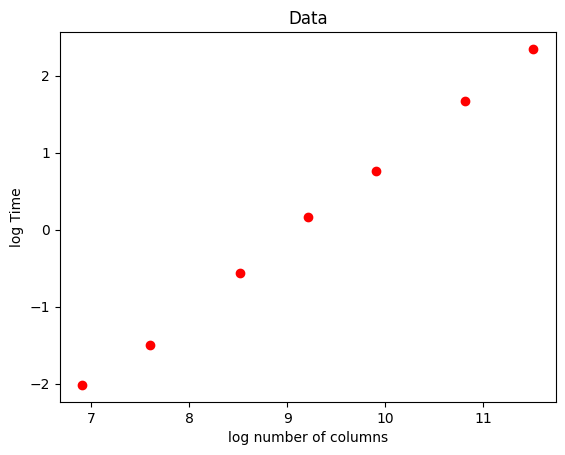

In [15]:
log_ncol = np.log(array_ncol)
log_time = np.log(array_time)
plt.figure()
plt.title("Data")
plt.xlabel("log number of columns")
plt.ylabel("log Time")
plt.plot(log_ncol,log_time,"ro")
plt.show()

"log_ncol" ve "log_time" verilerini lineer bir fonksiyona uyacak şekilde "polyfit" fonksiyonunu kullanarak uygun bir polinom katsayısı ("coeff") hesaplar.  İkinci satır, "coeff" dizisinin ilk elemanı, yani polinomun karmaşıklık derecesi olan "coeff[0]" değerini yazdırır.

In [16]:
# fit log ncol/log time data to linear function using polyfit 
# input 1 means fit to linear function
coeff = np.polyfit(log_ncol,log_time,1)
print("Coefficients: {}".format(coeff))
print("Complexity power: {}".format(coeff[0]))

Coefficients: [ 0.95912962 -8.71244856]
Complexity power: 0.9591296221310205


grafik çizdirilir.

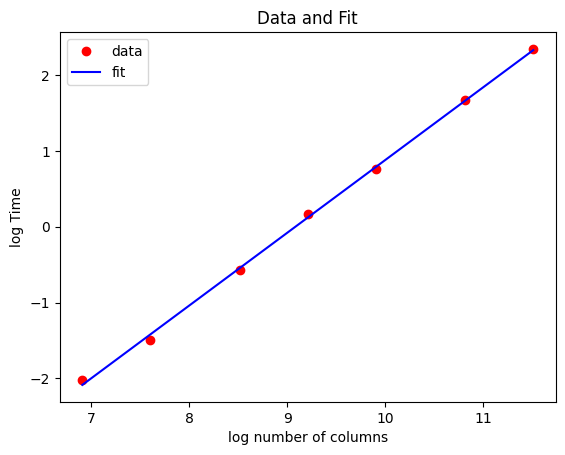

In [17]:
# create polynomial(linear function) based on coefficients
p = np.poly1d(coeff)
# evaluate poloynomaial at log_ncol points
plogndim = p(log_ncol)
plt.figure()
# plot orginal data again on loglog plot
plt.plot(log_ncol,log_time,"ro",label="data")
# plot fit line on loglog plot
plt.plot(log_ncol,plogndim,"b-",label="fit")
plt.legend()
plt.title("Data and Fit")
plt.ylabel("log Time")
plt.xlabel("log number of columns")
plt.show()